In [ ]:
!pip install pandas

In [ ]:
!pip install matplotlib seaborn

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [164]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [165]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [166]:
test.tail()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27999,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [167]:
train['label'].unique()

array([1, 0, 4, 7, 3, 5, 8, 9, 2, 6], dtype=int64)

In [168]:
train_y = train['label'].astype('float32')
train_x = train.drop(['label'],axis = 1).astype('int32')
test_x = test.astype('float32')
train_x.shape, train_y.shape, test_x.shape

((42000, 784), (42000,), (28000, 784))

In [169]:
train_x = train_x.values.reshape(-1,28,28,1)
train_x = train_x / 255.0
test_x = test_x.values.reshape(-1,28,28,1)
test_x = test_x / 255.0
train_x.shape, test_x.shape

((42000, 28, 28, 1), (28000, 28, 28, 1))

In [170]:
!pip install tensorflow keras

In [171]:
import tensorflow as tf

In [172]:
import keras

In [173]:
%matplotlib inline

In [174]:
train_y = tf.keras.utils.to_categorical(train_y,10)
train_y.shape

(42000, 10)

In [175]:
from keras.layers import Dense, Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.datasets import mnist

In [176]:
model = keras.Sequential([
    keras.layers.Conv2D(32,(3,3),activation = 'relu', input_shape=(28,28,1)),
    keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
    keras.layers.Conv2D(64,(3,3),activation = 'relu',padding = 'Same'),
    keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)),
    keras.layers.Dropout(0.25),
    keras.layers.Flatten(input_shape = (28,28,1)),
    keras.layers.Dense(256, activation="relu"),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
    
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 32)        9248      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 32)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                  

In [177]:
Optimizer = keras.optimizers.Adam(
            learning_rate=0.005, 
            beta_1=0.9, 
            beta_2=0.999, 
            epsilon=1e-07,
            name='Adam'
)

In [178]:
model.compile(optimizer=Optimizer,
             loss="categorical_crossentropy", 
             metrics=["accuracy"])

In [179]:
model.fit(train_x, train_y, batch_size = 50, epochs = 10)

Epoch 1/10
840/840 [==============================] - 46s 54ms/step - loss: 0.1756 - accuracy: 0.9462
Epoch 2/10
840/840 [==============================] - 55s 66ms/step - loss: 0.0859 - accuracy: 0.9756
Epoch 3/10
840/840 [==============================] - 53s 63ms/step - loss: 0.0674 - accuracy: 0.9816
Epoch 4/10
840/840 [==============================] - 53s 63ms/step - loss: 0.0648 - accuracy: 0.9819
Epoch 5/10
840/840 [==============================] - 54s 64ms/step - loss: 0.0645 - accuracy: 0.9820
Epoch 6/10
840/840 [==============================] - 55s 65ms/step - loss: 0.0546 - accuracy: 0.9853
Epoch 7/10
840/840 [==============================] - 54s 64ms/step - loss: 0.0546 - accuracy: 0.9856
Epoch 8/10
840/840 [==============================] - 56s 67ms/step - loss: 0.0522 - accuracy: 0.9867
Epoch 9/10
840/840 [==============================] - 58s 69ms/step - loss: 0.0562 - accuracy: 0.9859
Epoch 10/10
840/840 [==============================] - 54s 65ms/step - loss: 0.047

In [180]:
results = model.predict(test_x)

# select the index with the maximum probability
results = np.argmax(results,axis = 1)

results = pd.Series(results,name="Label")

875/875 [==============================] - 11s 12ms/step


In [181]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

submission.to_csv("submission-1.csv",index=False)

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

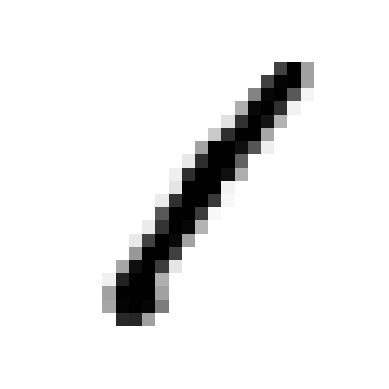

In [182]:
plt.imshow(train_x[0], cmap='binary')
plt.axis('off')
train_y[0]

In [183]:
print(train_y[0])

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


(-0.5, 27.5, 27.5, -0.5)

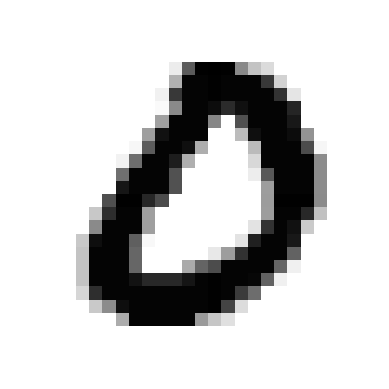

In [185]:
k = 6
plt.imshow(test_x[k], cmap='binary')
plt.axis('off')


In [187]:
model.get_metrics_result()

{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.047940377>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.9879048>}